In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Titanic.csv")
df_test=pd.read_csv("Titanic_Test.csv")

In [242]:
# Feature scaling function
def scale(x):
    x=(x-x.mean())/x.std()
    return x

In [243]:
# Handling Data
X=df[['Age','Fare','Sex','sibsp','Parch', 'Pclass']]
X.insert(0, 'X0', 1)

#Scaling
for i in range(1,X.shape[1]):
    X[[i]]=scale(X[[i]]).values

#Adding polynomial features    
X_sq=X**2
X=pd.concat([X,X_sq],axis=1)

y=df[['2urvived']]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [244]:
print(X.shape)
print(y.shape)

(898, 14)
(898, 1)


In [245]:
#Converting to numpy array for Linear Regression
T=np.array(X.shape[1]*[[0]])
X=np.array(X)
y=np.array(y)
print(T.shape)
print(X.shape)
print(y.shape)

(14, 1)
(898, 14)
(898, 1)


In [246]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [247]:
    n=float(X.shape[0])
    r=X.shape[1]
    print(n,r)

    grad=r*[0]

898.0 14


In [248]:
# TRAINING DATA USING GRADIENT DESCENT
J=[]
m=[]
alpha=0.02
for i in range(0,500):
    h=sigmoid(np.dot(X,T))
    e=np.square(y-h)
    J.append(e.sum()/n)
    m.append(i)
    grad=np.dot(np.transpose(X),h-y)/n
    T=T-(grad*alpha)
    if(i%100==0):
        print('Cost function after',i,'iteration :',J[i])


Cost function after 0 iteration : 0.25
Cost function after 100 iteration : 0.1637688652758178
Cost function after 200 iteration : 0.15044576610643765
Cost function after 300 iteration : 0.14578884406220205
Cost function after 400 iteration : 0.14382310479519425


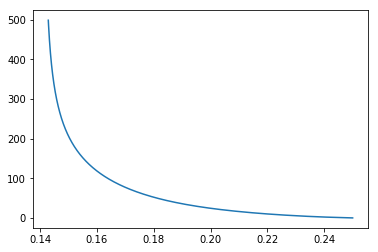

In [249]:
plt.plot(J,m)
plt.show();

In [250]:
# Prediction
h=sigmoid(np.dot(X,T))
pred=[]
for i in range(len(y)):
    if(h[i]<=0.5):
        pred.append([0])
    if(h[i]>=0.5):
        pred.append([1])

In [251]:
# Calculating Accuracy
count=0
for i in range(len(y)):
    if(pred[i]==y[i]):
        count+=1
print (count,len(y))    
print(count/len(y))

711 898
0.7917594654788419


In [252]:
# Handling Data
X_test=df_test[['Age','Fare','Sex','sibsp','Parch', 'Pclass']]
X_test.insert(0, 'X0', 1)

#Scaling
for i in range(1,X_test.shape[1]):
    X_test[[i]]=scale(X_test[[i]]).values

#Adding polynomial features    
X_sq_test=X_test**2
X_test=pd.concat([X_test,X_sq_test],axis=1)

y_test=df_test[['2urvived']]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [253]:
#Converting to numpy array for Linear Regression

X_test=np.array(X_test)
y_test=np.array(y_test)
print(T.shape)
print(X_test.shape)
print(y_test.shape)

(14, 1)
(411, 14)
(411, 1)


In [254]:
h=sigmoid(np.dot(X_test,T))

In [255]:
# Prediction
pred=[]
for i in range(len(y_test)):   
    if(h[i]<=0.5):
        pred.append([0])
    if(h[i]>=0.5):
        pred.append([1])
pred=np.array(pred)    

In [256]:
#Accuracy
count=0
for i in range(len(y_test)):
    if(pred[i]==y_test[i]):
        count+=1
print (count,'/',len(y_test))   
per=(count/len(y_test))*100
print(per,'%')

310 / 411
75.4257907542579 %
